## 데이터로드

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

# plotting 환경 설정
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
plt.rcParams['figure.figsize'] = (5,5) # 그래프 크기
plt.rcParams['font.family'] = 'Malgun Gothic' # 글꼴
plt.rcParams['font.size'] = 12 # 글꼴 크기
plt.rcParams['axes.unicode_minus'] = False # 마이너스 표기

# 그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline

In [4]:
# 데이터를 구분하는 문자를 지정하는 옵션
# 제목만 전처리한 항목
vod = pd.read_csv('../data/전처리data/vod_prepro_series_nm.csv')
con = pd.read_csv('../data/전처리data/con_prepro_series_nm.csv', encoding='cp949')

In [5]:
# 필요한 column
vod_ex = vod[['subsr', 'rename', 'Category', 'strt_dt', 'use_tms', 'disp_rtm', 'vod_id']]
vod_ex

# 중복 확인
vod_ex[vod_ex.duplicated()]

# column명 바꾸기
vod_ex.rename(columns={'strt_dt' : 'log_dt'}, inplace=True)
vod_ex

C:\Users\user\AppData\Local\Temp\ipykernel_11568\2476289834.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vod_ex.rename(columns={'strt_dt' : 'log_dt'}, inplace=True)


,subsr,rename,Category,log_dt,use_tms,disp_rtm,vod_id
0,65941000,그것이알고싶다,TV프로그램,20230812163507,80.0,80,297
1,66873000,그것이알고싶다,TV프로그램,20230816205227,80.0,80,297
2,66873000,그것이알고싶다,TV프로그램,20230829194727,12.0,80,297
3,61689000,그것이알고싶다,TV프로그램,20230813130609,80.0,80,297
4,61619000,꼬리에꼬리를무는그날이야기,TV프로그램,20230804092737,69.7,73,8
...,...,...,...,...,...,...,...
10156,60169000,간질간질,키즈,20230914211110,6.0,6,3674
10157,66317000,알사탕,키즈,20230903223544,8.0,8,3671
10158,66317000,알사탕,키즈,20230903223210,3.3,8,3671
10159,66900000,월간아기상어,키즈,20230904120057,0.8,1,406


In [6]:
# 필요한 column
con_ex = con[['subsr', 'rename', 'Category', 'log_dt', 'vod_id']]

# 중복 확인
con_ex[con_ex.duplicated()]
con_ex = con_ex.drop_duplicates().reset_index(drop=True)
con_ex

,subsr,rename,Category,log_dt,vod_id
0,65968000,핑크퐁동물동요,키즈,20230813071155,882
1,65968000,핑크퐁동물동요,키즈,20230813071215,882
2,63086000,지니강이플러스시즌7,키즈,20230827145542,1622
3,63086000,지니강이플러스시즌9,키즈,20230827152417,2043
4,62733000,엘리가간다시즌12,키즈,20230816112816,1958
...,...,...,...,...,...
21100,64551000,슈퍼토끼,키즈,20230930121657,544
21101,64551000,슈퍼토끼,키즈,20230930121654,544
21102,64551000,슈퍼토끼,키즈,20230930121656,544
21103,64551000,슈퍼토끼,키즈,20230930121646,544


In [7]:
# vod - watched, con - click
vod_ex['type'] = 'watched'
con_ex['type'] = 'click'

C:\Users\user\AppData\Local\Temp\ipykernel_11568\190279175.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vod_ex['type'] = 'watched'


In [8]:
vod_ex

,subsr,rename,Category,log_dt,use_tms,disp_rtm,vod_id,type
0,65941000,그것이알고싶다,TV프로그램,20230812163507,80.0,80,297,watched
1,66873000,그것이알고싶다,TV프로그램,20230816205227,80.0,80,297,watched
2,66873000,그것이알고싶다,TV프로그램,20230829194727,12.0,80,297,watched
3,61689000,그것이알고싶다,TV프로그램,20230813130609,80.0,80,297,watched
4,61619000,꼬리에꼬리를무는그날이야기,TV프로그램,20230804092737,69.7,73,8,watched
...,...,...,...,...,...,...,...,...
10156,60169000,간질간질,키즈,20230914211110,6.0,6,3674,watched
10157,66317000,알사탕,키즈,20230903223544,8.0,8,3671,watched
10158,66317000,알사탕,키즈,20230903223210,3.3,8,3671,watched
10159,66900000,월간아기상어,키즈,20230904120057,0.8,1,406,watched


In [9]:
con_ex

,subsr,rename,Category,log_dt,vod_id,type
0,65968000,핑크퐁동물동요,키즈,20230813071155,882,click
1,65968000,핑크퐁동물동요,키즈,20230813071215,882,click
2,63086000,지니강이플러스시즌7,키즈,20230827145542,1622,click
3,63086000,지니강이플러스시즌9,키즈,20230827152417,2043,click
4,62733000,엘리가간다시즌12,키즈,20230816112816,1958,click
...,...,...,...,...,...,...
21100,64551000,슈퍼토끼,키즈,20230930121657,544,click
21101,64551000,슈퍼토끼,키즈,20230930121654,544,click
21102,64551000,슈퍼토끼,키즈,20230930121656,544,click
21103,64551000,슈퍼토끼,키즈,20230930121646,544,click


### score 생성

In [10]:
# 정렬
vod_list = pd.concat([vod_ex, con_ex], ignore_index = True).sort_values('log_dt')
vod_list

# 중복 확인
vod_list[vod_list.duplicated()]

,subsr,rename,Category,log_dt,use_tms,disp_rtm,vod_id,type


In [11]:
vod_list['log_dt'] = pd.to_datetime(vod_list['log_dt'], format='%Y%m%d%H%M%S')

vod_list

,subsr,rename,Category,log_dt,use_tms,disp_rtm,vod_id,type
16626,60224000,아씨두리안,TV프로그램,2023-08-01 00:00:38,NaN,NaN,780,click
11499,65265000,러브포세일,영화,2023-08-01 00:04:44,NaN,NaN,1267,click
13589,64399000,악마들,영화,2023-08-01 00:07:01,NaN,NaN,2603,click
18024,60067000,학려화정,TV프로그램,2023-08-01 00:29:22,NaN,NaN,954,click
3580,60067000,학려화정,TV프로그램,2023-08-01 00:29:38,32.7,40.0,954,watched
...,...,...,...,...,...,...,...,...
7618,64130000,효심이네각자도생,TV프로그램,2023-09-30 23:41:19,0.0,64.0,1885,watched
7491,64154000,최강배달꾼,TV프로그램,2023-09-30 23:51:26,0.0,56.0,754,watched
23683,64984000,각시탈,TV프로그램,2023-09-30 23:56:19,NaN,NaN,757,click
7166,64984000,각시탈,TV프로그램,2023-09-30 23:57:02,0.0,64.0,757,watched


In [12]:
vod_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31266 entries, 16626 to 6795
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   subsr     31266 non-null  int64         
 1   rename    31266 non-null  object        
 2   Category  31266 non-null  object        
 3   log_dt    31266 non-null  datetime64[ns]
 4   use_tms   10161 non-null  float64       
 5   disp_rtm  10161 non-null  float64       
 6   vod_id    31266 non-null  int64         
 7   type      31266 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 2.1+ MB


subsr, rename, Category 기준으로 같은 것 개수 세기

In [13]:
conditions = [
    vod_list['type'] == 'click',
    vod_list['type'] == 'watched'
]

choices = [1, 2]

vod_list['Weight'] = np.select(conditions, choices, default='0')

# type 변환 
vod_list['Weight'] = pd.to_numeric(vod_list['Weight'])
vod_list

,subsr,rename,Category,log_dt,use_tms,disp_rtm,vod_id,type,Weight
16626,60224000,아씨두리안,TV프로그램,2023-08-01 00:00:38,NaN,NaN,780,click,1
11499,65265000,러브포세일,영화,2023-08-01 00:04:44,NaN,NaN,1267,click,1
13589,64399000,악마들,영화,2023-08-01 00:07:01,NaN,NaN,2603,click,1
18024,60067000,학려화정,TV프로그램,2023-08-01 00:29:22,NaN,NaN,954,click,1
3580,60067000,학려화정,TV프로그램,2023-08-01 00:29:38,32.7,40.0,954,watched,2
...,...,...,...,...,...,...,...,...,...
7618,64130000,효심이네각자도생,TV프로그램,2023-09-30 23:41:19,0.0,64.0,1885,watched,2
7491,64154000,최강배달꾼,TV프로그램,2023-09-30 23:51:26,0.0,56.0,754,watched,2
23683,64984000,각시탈,TV프로그램,2023-09-30 23:56:19,NaN,NaN,757,click,1
7166,64984000,각시탈,TV프로그램,2023-09-30 23:57:02,0.0,64.0,757,watched,2


In [14]:
# 계정별 동일 프로그램명 개수 count
vod_count = vod_list.groupby(['subsr', 'rename', 'Category', 'vod_id'])['Weight'].sum().reset_index()
vod_count.columns = ['subsr', 'rename', 'Category', 'vod_id', 'Affinity']
vod_count

,subsr,rename,Category,vod_id,Affinity
0,59879000,나쁜엄마,TV프로그램,3403,1
1,59879000,나의해방일지,TV프로그램,1859,1
2,59879000,낭만닥터김사부2,TV프로그램,1168,1
3,59879000,소방서옆경찰서,TV프로그램,2092,7
4,59879000,슬기로운의사생활시즌2,TV프로그램,2891,1
...,...,...,...,...,...
7700,67160000,심야괴담회,TV프로그램,143,1
7701,67160000,콘크리트유토피아,영화,2630,1
7702,67161000,스파이코드명포춘,영화,3824,5
7703,67164000,미션임파서블:데드레코닝PARTONE,영화,2867,2


In [15]:
# 최근에 시청한 vod에 가중치 - timedecay
T = 60

t_ref = pd.to_datetime(vod_list['log_dt'], "").max()

In [16]:
t_ref

Timestamp('2023-09-30 23:57:36')

In [17]:
# Timedecay 생성 

vod_list['Timedecay'] = vod_list.apply(
    lambda x: x['Weight'] * np.power(0.5, (t_ref - pd.to_datetime(x['log_dt'])).days / T),
    axis=1
)
vod_list

,subsr,rename,Category,log_dt,use_tms,disp_rtm,vod_id,type,Weight,Timedecay
16626,60224000,아씨두리안,TV프로그램,2023-08-01 00:00:38,NaN,NaN,780,click,1,0.5
11499,65265000,러브포세일,영화,2023-08-01 00:04:44,NaN,NaN,1267,click,1,0.5
13589,64399000,악마들,영화,2023-08-01 00:07:01,NaN,NaN,2603,click,1,0.5
18024,60067000,학려화정,TV프로그램,2023-08-01 00:29:22,NaN,NaN,954,click,1,0.5
3580,60067000,학려화정,TV프로그램,2023-08-01 00:29:38,32.7,40.0,954,watched,2,1.0
...,...,...,...,...,...,...,...,...,...,...
7618,64130000,효심이네각자도생,TV프로그램,2023-09-30 23:41:19,0.0,64.0,1885,watched,2,2.0
7491,64154000,최강배달꾼,TV프로그램,2023-09-30 23:51:26,0.0,56.0,754,watched,2,2.0
23683,64984000,각시탈,TV프로그램,2023-09-30 23:56:19,NaN,NaN,757,click,1,1.0
7166,64984000,각시탈,TV프로그램,2023-09-30 23:57:02,0.0,64.0,757,watched,2,2.0


In [18]:
vod_list[vod_list['rename'] == '엘리멘탈']

,subsr,rename,Category,log_dt,use_tms,disp_rtm,vod_id,type,Weight,Timedecay
12638,65132000,엘리멘탈,영화,2023-08-15 01:17:50,NaN,NaN,2288,click,1,0.587774
12626,65132000,엘리멘탈,영화,2023-08-15 01:19:35,NaN,NaN,2288,click,1,0.587774
12635,65132000,엘리멘탈,영화,2023-08-15 01:19:44,NaN,NaN,2288,click,1,0.587774
12631,61931000,엘리멘탈,영화,2023-08-15 01:20:07,NaN,NaN,2288,click,1,0.587774
12641,60169000,엘리멘탈,영화,2023-08-15 01:47:39,NaN,NaN,2288,click,1,0.587774
...,...,...,...,...,...,...,...,...,...,...
29248,66560000,엘리멘탈,영화,2023-09-29 18:23:47,NaN,NaN,2288,click,1,0.988514
29230,66976000,엘리멘탈,영화,2023-09-30 00:58:53,NaN,NaN,2288,click,1,1.000000
29232,64663000,엘리멘탈,영화,2023-09-30 09:13:46,NaN,NaN,2288,click,1,1.000000
29231,64551000,엘리멘탈,영화,2023-09-30 09:21:56,NaN,NaN,2288,click,1,1.000000


In [19]:
# subsr, series_nm별 affinity 합
data2_wt = vod_list.groupby(['subsr', 'rename', 'Category', 'vod_id'])['Timedecay'].sum().reset_index()
data2_wt.columns = ['subsr', 'rename', 'Category', 'vod_id', 'Affinity']
data2_wt

,subsr,rename,Category,vod_id,Affinity
0,59879000,나쁜엄마,TV프로그램,3403,0.500000
1,59879000,나의해방일지,TV프로그램,1859,0.500000
2,59879000,낭만닥터김사부2,TV프로그램,1168,0.500000
3,59879000,소방서옆경찰서,TV프로그램,2092,3.500000
4,59879000,슬기로운의사생활시즌2,TV프로그램,2891,0.500000
...,...,...,...,...,...
7700,67160000,심야괴담회,TV프로그램,143,0.890899
7701,67160000,콘크리트유토피아,영화,2630,0.933033
7702,67161000,스파이코드명포춘,영화,3824,4.506252
7703,67164000,미션임파서블:데드레코닝PARTONE,영화,2867,1.954320


In [20]:
data2_wt[data2_wt.duplicated()]

,subsr,rename,Category,vod_id,Affinity


In [21]:
data2_wt['Affinity'].sort_values()

0         0.500000
6387      0.500000
6385      0.500000
2842      0.500000
4383      0.500000
           ...    
7554    191.191742
4418    220.270237
455     235.544253
6888    247.112568
3592    519.150137
Name: Affinity, Length: 7705, dtype: float64

In [22]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy import stats
# 로그 변환 적용
data2_wt['Affinity'] = np.log1p(data2_wt['Affinity'])
# Min-Max 스케일링 적용
# scaler = MinMaxScaler(feature_range=(0,1))
# c_score['Affinity'] = scaler.fit_transform(c_score[['Affinity']])
# 스케일링된 값 정수로 변환
# c_score['Affinity'] = c_score['Affinity'].round().astype(int)
# 결과 확인
score = data2_wt.copy()
score

,subsr,rename,Category,vod_id,Affinity
0,59879000,나쁜엄마,TV프로그램,3403,0.405465
1,59879000,나의해방일지,TV프로그램,1859,0.405465
2,59879000,낭만닥터김사부2,TV프로그램,1168,0.405465
3,59879000,소방서옆경찰서,TV프로그램,2092,1.504077
4,59879000,슬기로운의사생활시즌2,TV프로그램,2891,0.405465
...,...,...,...,...,...
7700,67160000,심야괴담회,TV프로그램,143,0.637052
7701,67160000,콘크리트유토피아,영화,2630,0.659090
7702,67161000,스파이코드명포춘,영화,3824,1.705884
7703,67164000,미션임파서블:데드레코닝PARTONE,영화,2867,1.083268


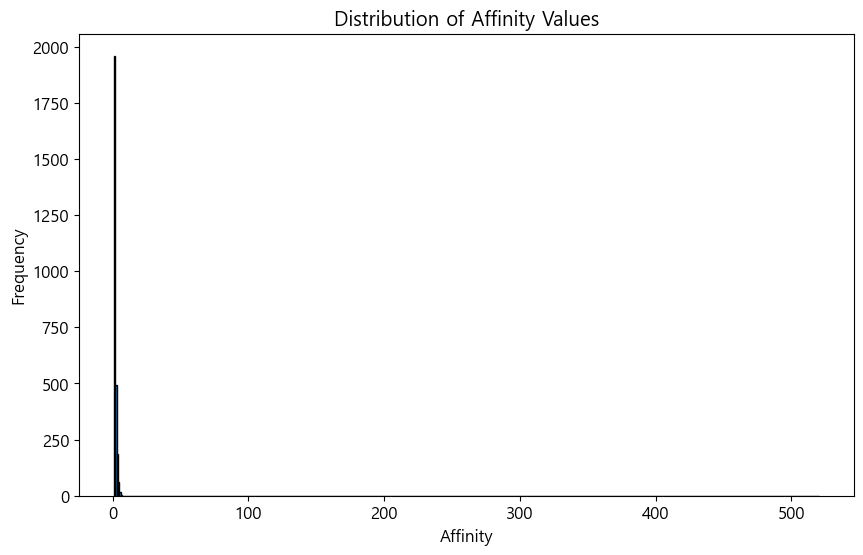

In [24]:
# 30 range
plt.figure(figsize=(10, 6))
plt.hist(score['Affinity'], bins=520, range=(1, 520), edgecolor='black')  # Adjust the number of bins as needed
plt.title('Distribution of Affinity Values')
plt.xlabel('Affinity')
plt.ylabel('Frequency')
plt.show()

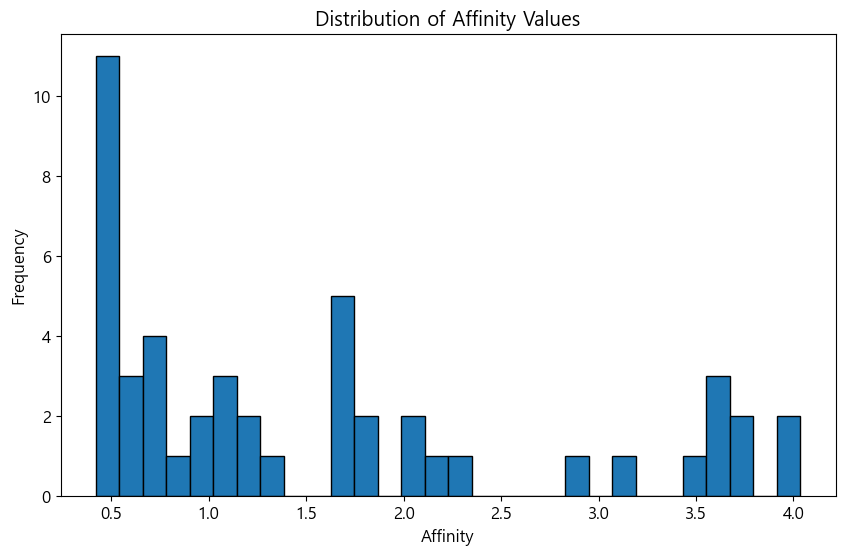

In [26]:
# 30 range
plt.figure(figsize=(10, 6))
plt.hist(score[score['subsr']==66873000].Affinity, bins=30, edgecolor='black')  # Adjust the number of bins as needed
plt.title('Distribution of Affinity Values')
plt.xlabel('Affinity')
plt.ylabel('Frequency')
plt.show()

subsr별 평점 만들기

In [27]:
# subsr별 affinity range 확인 
affinity_range = score.groupby('subsr')['Affinity'].agg(['min', 'max'])
affinity_range

,min,max
subsr,,
59879000,0.405465,2.602690
59882000,0.458072,0.771055
59886000,0.530031,0.924348
59890000,0.449643,0.449643
59892000,0.453842,0.693147
...,...,...
67149000,0.599765,0.982961
67154000,1.473294,1.473294
67160000,0.637052,0.687388


In [28]:
# 5개 구간으로 나눔
def assign_ratings(row):
    min_affinity, max_affinity = affinity_range.loc[row['subsr']]
    
    # min과 max가 같은 경우, 모든 값에 3을 부여
    if min_affinity == max_affinity:
        return 5
    
    interval = (max_affinity - min_affinity) / 5
    rating = np.ceil((row['Affinity'] - min_affinity) / interval)
    return min(max(rating, 1), 5)

In [29]:
score['ratings'] = score.apply(assign_ratings, axis=1)
score

,subsr,rename,Category,vod_id,Affinity,ratings
0,59879000,나쁜엄마,TV프로그램,3403,0.405465,1.0
1,59879000,나의해방일지,TV프로그램,1859,0.405465,1.0
2,59879000,낭만닥터김사부2,TV프로그램,1168,0.405465,1.0
3,59879000,소방서옆경찰서,TV프로그램,2092,1.504077,3.0
4,59879000,슬기로운의사생활시즌2,TV프로그램,2891,0.405465,1.0
...,...,...,...,...,...,...
7700,67160000,심야괴담회,TV프로그램,143,0.637052,1.0
7701,67160000,콘크리트유토피아,영화,2630,0.659090,3.0
7702,67161000,스파이코드명포춘,영화,3824,1.705884,5.0
7703,67164000,미션임파서블:데드레코닝PARTONE,영화,2867,1.083268,1.0


In [30]:
score[score.duplicated()]

,subsr,rename,Category,vod_id,Affinity,ratings


In [36]:
score['ratings'].value_counts()

1.0    4219
5.0    1228
2.0    1091
3.0     711
4.0     456
Name: ratings, dtype: int64

In [37]:
score.to_csv('c_score_rate.csv', index=False)